In [ ]:
import os


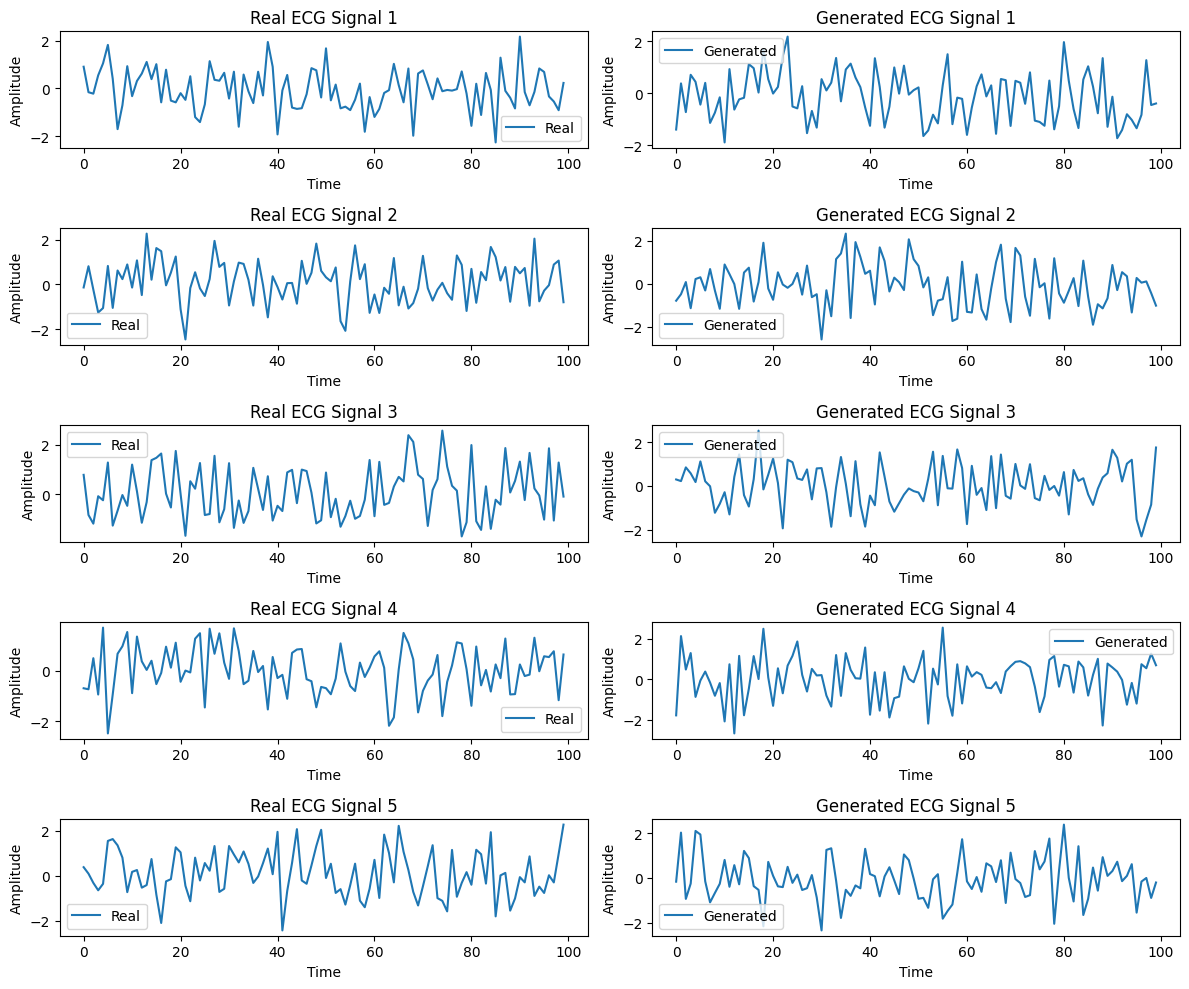

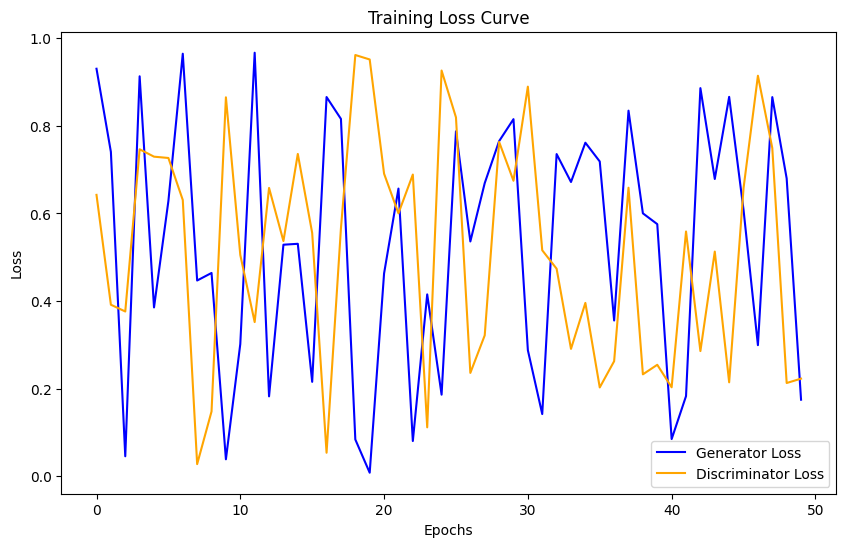

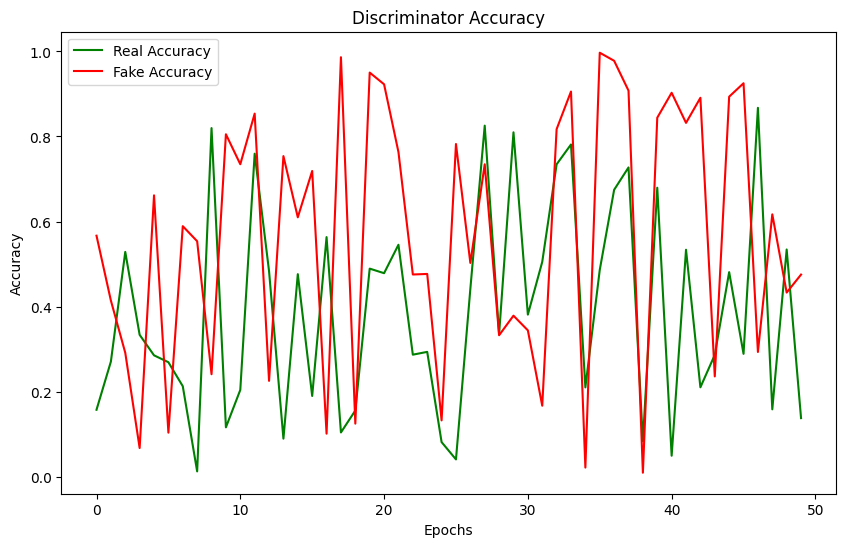

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot real vs. generated ECG signals
def plot_ecg_signals(real_signals, generated_signals, num_samples=5, save_path=None):
    """
    Visualizes real and generated ECG signals side by side.

    :param real_signals: Numpy array of real ECG signals
    :param generated_signals: Numpy array of generated ECG signals
    :param num_samples: Number of signals to visualize
    :param save_path: Path to save the figure (optional)
    """
    num_samples = min(num_samples, len(real_signals), len(generated_signals))

    plt.figure(figsize=(12, num_samples * 2))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.plot(real_signals[i], label="Real")
        plt.title(f"Real ECG Signal {i + 1}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.legend()

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.plot(generated_signals[i], label="Generated")
        plt.title(f"Generated ECG Signal {i + 1}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.legend()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to plot training progress (loss curves)
def plot_training_progress(generator_loss, discriminator_loss, save_path=None):
    """
    Visualizes the training progress by plotting generator and discriminator loss.

    :param generator_loss: List of generator loss values
    :param discriminator_loss: List of discriminator loss values
    :param save_path: Path to save the figure (optional)
    """
    plt.figure(figsize=(10, 6))
    plt.plot(generator_loss, label="Generator Loss", color="blue")
    plt.plot(discriminator_loss, label="Discriminator Loss", color="orange")
    plt.title("Training Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to visualize discriminator performance (accuracy)
def plot_discriminator_accuracy(real_accuracy, fake_accuracy, save_path=None):
    """
    Visualizes discriminator accuracy on real and fake signals during training.

    :param real_accuracy: List of discriminator accuracy on real signals
    :param fake_accuracy: List of discriminator accuracy on fake signals
    :param save_path: Path to save the figure (optional)
    """
    plt.figure(figsize=(10, 6))
    plt.plot(real_accuracy, label="Real Accuracy", color="green")
    plt.plot(fake_accuracy, label="Fake Accuracy", color="red")
    plt.title("Discriminator Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Simulated data for demonstration (replace with actual GAN outputs)
    real_signals = np.random.normal(size=(10, 100))  # Replace with real ECG signals
    generated_signals = np.random.normal(size=(10, 100))  # Replace with generated ECG signals

    generator_loss = np.random.rand(50)  # Replace with actual generator loss
    discriminator_loss = np.random.rand(50)  # Replace with actual discriminator loss

    real_accuracy = np.random.rand(50)  # Replace with actual real signal accuracy
    fake_accuracy = np.random.rand(50)  # Replace with actual fake signal accuracy

    # Visualizations
    plot_ecg_signals(real_signals, generated_signals, num_samples=5, save_path="ecg_signals.png")
    plot_training_progress(generator_loss, discriminator_loss, save_path="loss_curve.png")
    plot_discriminator_accuracy(real_accuracy, fake_accuracy, save_path="discriminator_accuracy.png")


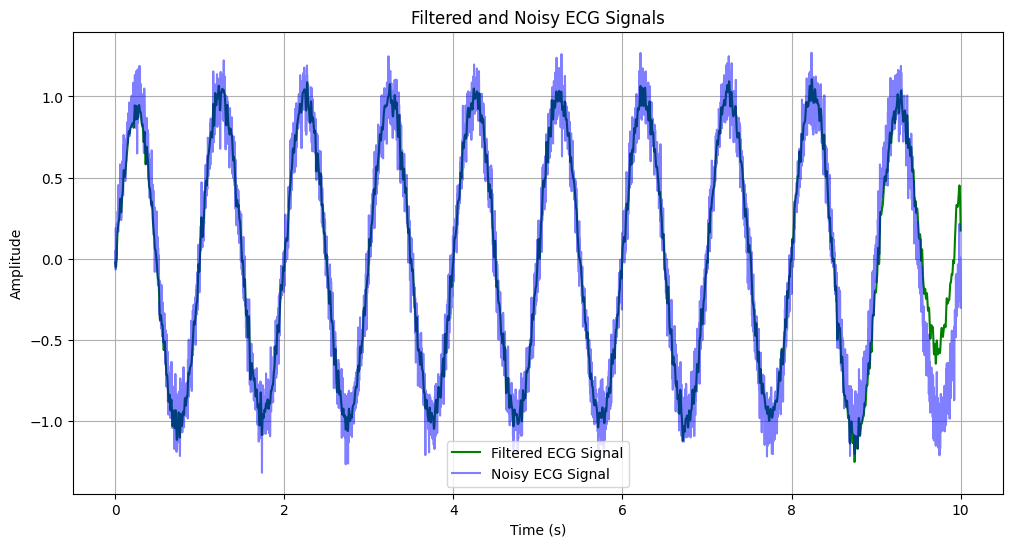

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Simulate an ECG-like signal (for demonstration)
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
ecg_signal = np.sin(2 * np.pi * 1 * t)  # Simple sinusoidal signal

# Add noise to simulate a realistic signal
noise = np.random.normal(0, 0.1, len(t))
ecg_signal_noisy = ecg_signal + noise  # Add noise to the signal

# Bandpass filter design
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

# Apply the filter to the noisy ECG signal
lowcut = 0.5
highcut = 50.0
filtered_ecg = bandpass_filter(ecg_signal_noisy, lowcut, highcut, fs)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_ecg, label="Filtered ECG Signal", color="green")
plt.plot(t, ecg_signal_noisy, label="Noisy ECG Signal", color="blue", alpha=0.5)
plt.title("Filtered and Noisy ECG Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()